# **CourseWork Task**

Provided with a dataset where there are 100 different categories of objects each which has 500 images for training and 100 images for testing.The objects are also grouped into 20 “super-classes”. The size of each image is fixed at 32x32x3, corresponding to height, width, and colour channel, respectively.The training images will be used to train your model(s), and the testing images will be used to evaluate your model(s). Task is to apply ML Algorithims to classify the testing images into object categories.To do this compute image features and visualize images then use a model to perform classification and report quantitative
results.

**Task1 - Download cifar100 dataset**
1. Import the important packages: `numpy,matplotlib.pyplot, skimage.feature and tensorflow`
2. download the cifar100 datasets
3. split the into training, testing datasets and corresponding labels
3. check their dimensions
4. transpose the from `(x_samples, height, width, color_channels) to (height, width, color_channels, x_samples)`

color_channels are the RGB color codes



In [3]:
# import numpy package
import numpy as np
# import matplotlib package for visualisation
import matplotlib.pyplot as plt
# skimage.feature.hog() function to obtain features we wish to train our models
# on, how to visualize these features as an image, and how to visualize a raw image
# from the 4D array
import skimage.feature
# import tensorflow
import tensorflow as tf

# load the CIFAR-100 dataset.
(train, train_labels), (test, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

# check the dataset
print(train.shape)
print(train_labels.shape)
print(test.shape)
print(test_labels.shape)

# transpose the dataset from (x_samples, height, width, color_channels) to (height, width, color_channels, x_samples)
# color_channels= RGB
transposed_train=np.transpose(train,[1,2,3,0])
transposed_test=np.transpose(test,[1,2,3,0])
print(transposed_test.shape)

# create an array of the class names
target_name=['aquatic mammals','fish','flowers','food containers','fruit and vegetables',
'household electrical devices','household furniture','insects','large carnivores',
'large man-made outdoor things','large natural outdoor scenes','large omnivores and herbivores',
'medium-sized mammals','non-insect invertebrates','people','reptiles','small mammals',
'trees','vehicles 1','vehicles 2']

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
(32, 32, 3, 10000)


**Task2 : Test Extraction of features from a single image**

Extracting image features enables the model to identify the object by looking at the image desprictor which is `a simplified representation of the image that contains only the most important information about the image.`Pick a specific image to index into the `i,j,k,lth` element of `X` we use `X[i, j, k, l]`. Use skimage.feature.hog function to `Extract Histogram of Oriented Gradients (HOG)` for a given image to represent image domain features as a vector. It analyzes the distribution of edge orientations within an object to describe its shape and appearance.The HOG method involves computing the gradient magnitude and orientation for each pixel in an image and then dividing the image into small cells.

**Task3 - Visualise the HoG Feauters**
We want to examine roughly what the output of the hog() function is doing using an example of one image. The feature extractor provides a representation that indicates the direction and intensity of gradients within certain parts of the picture.

The extracted feature vector is of length 15876 per sample


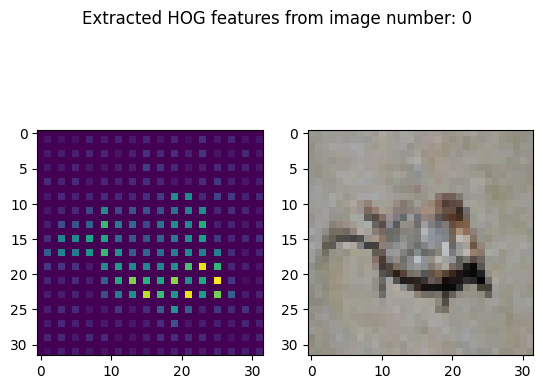

In [4]:
# use the index notation X[:, :, :, 4]
image = transposed_train[:, :, :,20]
# use skimage.feature.hog function
hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True,channel_axis=-1)
print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')
# print("feature\n",hog_feature)
# print("image\n",hog_image)

plt.figure()
plt.subplot(121)
plt.imshow(hog_image)
plt.subplot(122)
plt.imshow(image)
plt.suptitle(f'Extracted HOG features from image number: {0}')
plt.show(block=False)

**Slice the training data into 500 training and 100 testing and transpose the datasets**

Spliting the dataset into smaller position will reduce the training time of the neural network from 30mins for the training dataset of 50000 to 1 second for the training dataset of 5000.

In [5]:
# source on slicing numpy arrays: https://www.w3schools.com/python/numpy/numpy_array_slicing.asp
# get 500 images for training data
train_dataset=train[:500]
train_lab=train_labels[:500]
# get 100 images for testing
test_dataset=test[:100]
test_lab=test_labels[:100]

# transpose the dataset from (x_samples, height, width, color_channels) to (height, width, color_channels, x_samples)
# color_channels= RGB
transposed_train=np.transpose(train_dataset,[1,2,3,0])
print(transposed_train.shape)
transposed_test=np.transpose(test_dataset,[1,2,3,0])
print(transposed_test.shape)

(32, 32, 3, 500)
(32, 32, 3, 100)


**Get features for the 500 training and 100 testing image datasets using HoG function**

1. Create an empty array for test and training data
2. Loop througth the numpy array of transposed images
3. Get the hog_feature of each image and append it to the empty array
4. convert array to numpy array
5. check the dimesnions of array to check if it extracted features of all images
6. Visualize the hog features

(500, 15876)
(100, 15876)


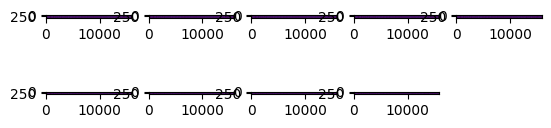

In [6]:
data1=[]
for i in range(transposed_train.shape[-1]):
  image = transposed_train[:, :, :,i]
  # use skimage.feature.hog function
  hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True,channel_axis=-1)
  data1.append(hog_feature)
  # print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')
train_dt=np.array(data1)
print(train_dt.shape)

data2=[]
for i in range(transposed_test.shape[-1]):
  image = transposed_test[:, :, :,i]
  # use skimage.feature.hog function
  hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True,channel_axis=-1)
  data2.append(hog_feature)
  # print(f'The extracted feature vector is of length {hog_feature.shape[0]} per sample')
test_dt=np.array(data2)
print(test_dt.shape)

plt.figure()
# plot first few images
for i in range(9):
 # define subplot
 plt.subplot(5, 5, i+1)
 # plot raw pixel data
 plt.imshow(train_dt[i:,])
# show the figure
plt.show(block=False)




Hog function takes a lot of time to extract feautures from the training dataset so we implement flattening of images and normalising.

In [7]:
# flatten the data
xtrain_flattened=train.reshape(50000,3072)
xtest_flattened=test.reshape(10000,3072)

# Normalise our data by dividing it by 255 (the maximum value in the original data)
norm_xtrain=xtrain_flattened/255.0
norm_ytest=xtest_flattened/255.0
print(norm_xtrain.shape)


(50000, 3072)


**Task4 - Use Learning Algorithms and compare them**

* Fully Connected Neural Network Neural Networks
* SVC and LSVC
* Convolutional Neural Networks

**Ways to build models for Neural Networks:**

1. `Defining the model ->` entails first determining the sort of model required, followed by determining the network topology.From an API standpoint, this entails specifying the model's layers configuring each layer with a number of nodes and activation functions, and integrating the levels into a coherent model. Models can be defined using either the `Sequential` API or the `Functional` API, as discussed in the next section.

2. `Compiling the model ->` first choose a `loss` function to `optimise`. It also necessitates the selection of an optimization method, often `stochastic gradient descent` or a contemporary version, such as `Adam`. It may also be necessary to specify any `metrics` to monitor throughout the model training process. From an API standpoint, this entails invoking a method to compile the model with the specified configuration, which will create the necessary data structures for the model's efficient usage.

3. Before `fiting the model`, first choose the training parameters, such as the number of `epochs `(loops over the training dataset) and `batch size` (number of samples in an epoch used to estimate model error). Training uses the specified optimization method to minimise the chosen loss function and backpropagation of the error algorithm to update the model. Fitting the model might take seconds, hours, or days, depending on the model's complexity, the technology used, and the quantity of the training dataset. From an API standpoint, this entails invoking a function to complete the training process. This function will not return until the training process is complete.

4.` Evaluate the model` using the `validation dataset`, which is 20% of the `training dataset `that was used to fit the model. From an API standpoint, this entails executing a function with the holdout dataset and receiving a `loss` as well as maybe additional` metrics` that can be given.

5. The final stage is to make a `prediction`. It needs fresh data for which a `prediction` is required, such as when the target values are unknown. From an API standpoint, we just use a function to predict a class label.

**Build fully conneceted Neural Network:**

[source](https://medium.com/swlh/fully-connected-vs-convolutional-neural-networks-813ca7bc6ee5)

Fully connected neural network is made up of many fully connected layers that connect every neuron in one layer to every neuron in the other.
The main advantage is that there is no specific assumptions about the input that are required and this more generally applicable. However they tend to perform worse than special-purpose networks tailored to the structure of a problem area.

`Dense Layers:` is a simple layer of neurons in which each neuron gets input from all neurons in the preceding layer.

`ReLU` - It assists the network in learning non-linear correlations between picture components, making the network more resilient in spotting diverse patterns. It also aids in the mitigation of vanishing gradient issues.

We will use the the extracted image features from the hog function to manually extract features from a images because a neural network does not do that process when training data unlike a CNN



In [8]:
# use 500 dataset : norm_xtrain,norm_ytest
# use 50000 train_dt,train_lab
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(10,activation=tf.nn.relu,kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation=tf.nn.relu, kernel_initializer='he_normal'),
    tf.keras.layers.Dense(len(np.unique(train_lab)), activation=tf.nn.sigmoid)])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

history = model.fit(norm_xtrain, train_labels, epochs=10,batch_size=64,
                      validation_split=0.2,verbose=1)
model.summary()


Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 2.9223 - accuracy: 0.0790 - val_loss: 2.8797 - val_accuracy: 0.0978
Epoch 2/10
548/625 [=========================>....] - ETA: 0s - loss: 2.8625 - accuracy: 0.0947

KeyboardInterrupt: 

**Plot the accuracy and error results**

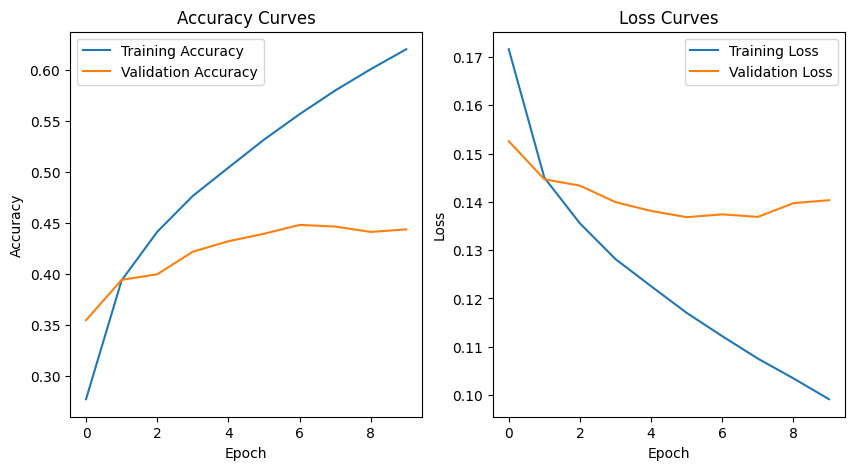

In [19]:
def plotResults(history):
        plt.figure(figsize=[10,5])
        plt.subplot(121)
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(['Training Accuracy',
                'Validation Accuracy'])
        plt.title('Accuracy Curves')

        plt.subplot(122)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(['Training Loss',
                'Validation Loss'])
        plt.title('Loss Curves')
        plt.show()
plotResults(history)



[source](https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/)


`Confusion Matrix` - Is a table used in statistics and machine learning to evaluate the performance of a classification model. It summarises the categorization findings by displaying the number of true positive, true negative, false positive, and false negative predictions. These numbers aid in evaluating a model's accuracy, precision, recall, and F1-score, which are critical metrics for determining how well the model categorises data. It does this by comparing the actual and expected values. The confusion matrix is a N x N matrix, with N indicating the number of classes or outputs. The rows represent the predicted values the columns represent the actual values.

`Accuracy Score` - This function computes subset accuracy in multilabel classification: the set of labels predicted for a sample must perfectly match the corresponding set of labels in `train_lab` or `test lab`.


`classification_report ` - outputs precision, recall, and f1-score for each target class plus:
1. Precision tells us how good the model is at predicting a specific class.
2. Recall tells you how many times the model was able to detect a specific class.
3. F1-score weighted average of precision and recall

From the results on the training dataset of 500 images the accuracy of the  model is 11% which is very low. Monitoring the classification report and confusion matrix for `fish` it is being classified as a `flower,large canivore, large-man made things and large out door scenes`. There is a hige bias towards the classification to `large out door scenes` target class for images. This might be due to the slicing of the dataset from 50000 to 500 which resulted in the model not being trained properly.

It takes **9.45s** to train model. From the results on the training dataset of 50000 images the accuracy of the  model is 10.34 %. Monitoring the classification report and confusion matrix for `fish` it is being miss-classified as a `flower,fruit and vegetables,household funiture,large carnivore, large outdoor things,etc.`. There is a hige bias towards the classification to `large outdoor things and fruit and vegetables` target class for images.The NN is still not being trained properly the classification of fish precision, recall and f1-score are all zero% 


In [2]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
# using 500 (test_dt, test_lab)
# use 50000 dataset : norm_xtrain,norm_ytest and train_labels, test_labels
# Predict labels for the testing set and report the accuracy of your model on the testing set.
predict_lab=model.predict(norm_ytest)
labels=predict_lab.argmax(axis=-1)
#report accuracy of model
# Return the mean accuracy on the given test data and labels.
mean_acc=accuracy_score(test_labels,labels)
print('NN Accuracy: %.3f' % (mean_acc * 100))

# source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

print(classification_report(test_labels, labels, target_names=target_name))

cf_mat=confusion_matrix(test_labels,labels)

cm_df = pd.DataFrame(cf_mat,
                     index = target_name, 
                     columns = target_name)

#Plotting the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

NameError: name 'norm_ytest' is not defined

**Using a Support Vector Classifier as a classifier** 
We use the 500 images because SVM only works with a small dataset fro 50000 images dataset it took more than an hour to fit the data. From the results on the training dataset of 500 images the accuracy of the  model is **12% 1 %** more than the Nueral Network which is still very low. Monitoring the classification report and confusion matrix for fish it is being classified as a  `medium sized mammals` and  `people` . There is a hige bias towards the classification to `medium sized mammals` target class for images.The SVC is still not being trained properly the classification of fish precision, recall and f1-score are all zero%.This might be due to the slicing of the dataset from 50000 to 500 which resulted in the model not being trained properly due to overfitting.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC Accuracy: 12.000
                                precision    recall  f1-score   support

               aquatic mammals       0.00      0.00      0.00         2
                          fish       0.00      0.00      0.00         8
                       flowers       0.00      0.00      0.00         9
               food containers       0.00      0.00      0.00         4
          fruit and vegetables       0.00      0.00      0.00         4
  household electrical devices       0.00      0.00      0.00         5
           household furniture       0.00      0.00      0.00         2
                       insects       0.00      0.00      0.00         6
              large carnivores       0.00      0.00      0.00         4
 large man-made outdoor things       0.00      0.00      0.00         3
  large natural outdoor scenes       0.40      0.60      0.48        10
large omnivores and herbivores       0.00      0.00      0.00         5
          medium-sized mammals       0.09 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

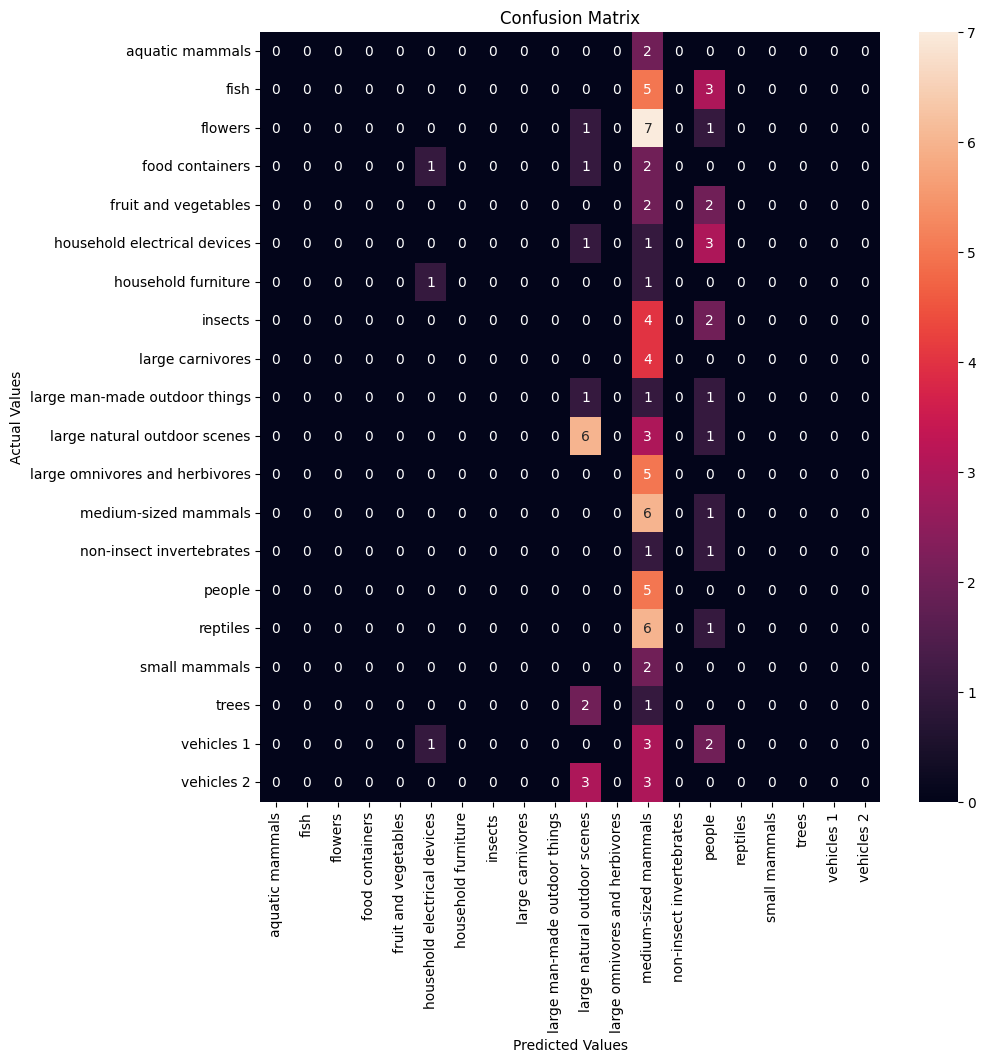

In [197]:
# use 500 dataset: train_dt,train_lab,test_dt,test_lab
# import StandardScaler class used to standardise the data
from sklearn.preprocessing import StandardScaler
# create a standar scaler object
scaler_obj = StandardScaler()
# fit the StandardScaler to the training data
scaler_obj.fit(train_dt)
# transform both testing and training data
transf_test=scaler_obj.transform(test_dt)
# print(transf_test.shape)
transf_train=scaler_obj.transform(train_dt)

# We use Support Vector classifier as a classifier
# import SVC object
from sklearn.svm import SVC
# create and training multiclass SVM on the training set
svc = SVC(gamma='auto')
# create an instance of SVC class by call its fit method
svc.fit(transf_train,train_lab)

# predit labels for the testing set
predict_lab=svc.predict(transf_test)
#report accuracy of model
# Return the mean accuracy on the given test data and labels.
score=svc.score(transf_test,test_lab,sample_weight=None)
print('SVC Accuracy: %.3f' % (score * 100))

print(classification_report(test_lab, predict_lab, target_names=target_name))

# get the confusion matrix of the SVC.
cf_mat=confusion_matrix(test_lab,predict_lab)

cm_df = pd.DataFrame(cf_mat,
                     index = target_name, 
                     columns = target_name)

#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


Use a Linear SVC 
This is supposed work for 10 thousands of datasets according to SVC documentation: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html. This did not work as the fitting of trainig dataset took more than an hour hence code was commented out.

In [198]:
# from sklearn.svm import LinearSVC
# # use 50000 dataset : norm_xtrain,norm_ytest and train_labels, test_labels
# # create a standar scaler object
# scaler_obj = StandardScaler()
# # fit the StandardScaler to the training data
# scaler_obj.fit(norm_xtrain)
# # transform both testing and training data
# transf_test=scaler_obj.transform(norm_ytest)
# # print(transf_test.shape)
# transf_train=scaler_obj.transform(norm_xtrain)
# lsvc = LinearSVC(dual="auto")
# lsvc.fit(transf_train,train_labels)
# # predit labels for the testing set
# predict_lab=lsvc.predict(transf_test)
# #report accuracy of model
# # Return the mean accuracy on the given test data and labels.
# score=svc.score(transf_test,test_lab,sample_weight=None)
# print('Linear SVC Accuracy: %.3f' % (score * 100))

**Build a fully connected Convulutional Nueral Nertwork:**

[source](https://www.datacamp.com/tutorial/cnn-tensorflow-python)

***`CNN`*** a deep learning method that assume that the inputs are pictures, allowing certain qualities to be encoded into the model architecture for tasks such as picture categorization. A basic ***`CNN`*** is a series of layers, and each layer of a ***`CNN`*** uses a differentiable function to translate one volume of activations to another. ***`CNN's`*** are efficient because they can do automated feature extraction at scale.  CNN uses a feature extractor in the training process of the model so we do not need to manually implement it usig the Hog function.

***`CNN`*** architecture is built with three types of layers: `Convolutional Layer`, `Pooling Layer`,`Rectified Linear Unit (ReLU for short)`and `Fully-Connected Layer`.

`Convolutional Layer` - allow ***`CNN`*** to identify patterns in data and extract features regardless of their position, whether the picture is rotated, scaled, or moved which makes ***`CNN`*** translatio n invariant. Convolution is the major mathematical function performed, which is the application of a sliding window function to a matrix of pixels representing an image. The sliding function that is applied to the matrix is known as the kernel or filter. Several equal-sized filters are utilised, and each filter is used to distinguish a certain pattern from the picture, such as the curvature of the digits, the edges, the overall form of the digits, and so on. The Convolutional layesrs block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model to increase the layers for more deep learning.


`Pooling Layer` - purpose is to extract the most important characteristics from the convoluted matrix. This is accomplished by the use of aggregation techniques, which minimise the dimension of the feature map (convoluted matrix), hence minimising the memory required for training the network. It is also useful for reducing overfitting.

Steps:
1. Create a sequential model.
2. Add convolution, maxpool,dropout layers.
3. Add the softmax activation function
4. Pass the optimizer parameter.
5. Compile the model.
6. Fit and train the model.
7. Check for the predictions.

**Results:**
When the CNN has 1 convolutional layers with small 3×3 filters followed by a max pooling layer on the input layer and 2 dense layers on the output. It takes **1m 52.7s** to train model for 50000 images.From the results on the training dataset of 50000 images the accuracy of the  model is **5%.** Monitoring the classification report for `fish` it is being classified as a `large outdoor things`. There is a hige bias towards the classification to `large outdoor things` target class for images.The NN is still not being trained properly. For the confusion matrix for `fish` there classification `precision`, `recall` and `f1-score` are all zero %.

When the CNN has double the layers. It takes **2m 2.9s** to train model for 50000 images.From the results accuracy of the  model is **19.09%**,  which is a 14% improvement. Monitoring the classification report and confusion matrix for `fish` there classification `precision` has gone up to  **18%** `recall` to **12%** and `f1-score` to **15%** all from zero%

When the CNN adds a 3rd layer.It takes **4m 54.7s** to train model for 50000 images. From the results accuracy of the model is **25.18%** accuracy 6% improvement.Monitoring the classification report and confusion matrix for `fish` there classification `precision` has gone up to  **35%** `recall` to **17%** and `f1-score` to **23%**

In [199]:
# using (train, train_labels), (test, test_labels)
model = tf.keras.Sequential()
# creating a deep neural network

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# the feature maps output from the feature extraction part of the model must be flattened
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(len(np.unique(train_labels)),activation='softmax'))
model.summary()

# compile and train model
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

history = model.fit(train, train_labels, epochs=10,batch_size=64,
                      validation_split=0.2,verbose=1)

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_119 (MaxPool  (None, 16, 16, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_121 (Conv2D)         (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_120 (MaxPool  (None, 8, 8, 64)          0         
 ing2D)                                                          
                                                                 
 flatten_58 (Flatten)        (None, 4096)              0         
                                                                 
 dense_146 (Dense)           (None, 128)             

Check the accuracy, confusion_matrix and classification report

313/313 [==============================] - 2s 7ms/step
CNN Accuracy: 29.430
                                precision    recall  f1-score   support

               aquatic mammals       0.35      0.23      0.28       500
                          fish       0.28      0.26      0.27       500
                       flowers       0.42      0.71      0.53       500
               food containers       0.28      0.37      0.32       500
          fruit and vegetables       0.38      0.33      0.35       500
  household electrical devices       0.26      0.24      0.25       500
           household furniture       0.23      0.23      0.23       500
                       insects       0.23      0.39      0.29       500
              large carnivores       0.16      0.09      0.12       500
 large man-made outdoor things       0.32      0.33      0.33       500
  large natural outdoor scenes       0.41      0.50      0.45       500
large omnivores and herbivores       0.22      0.21      0.

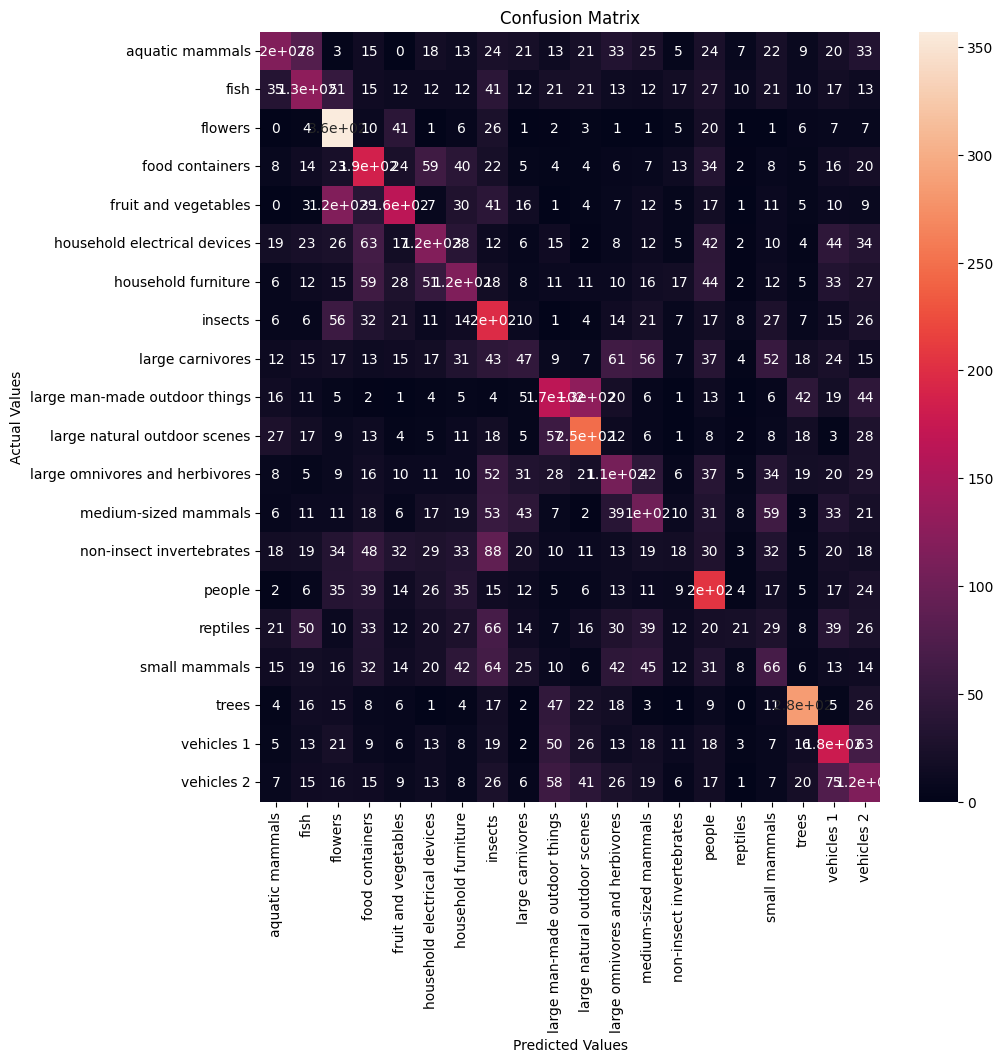

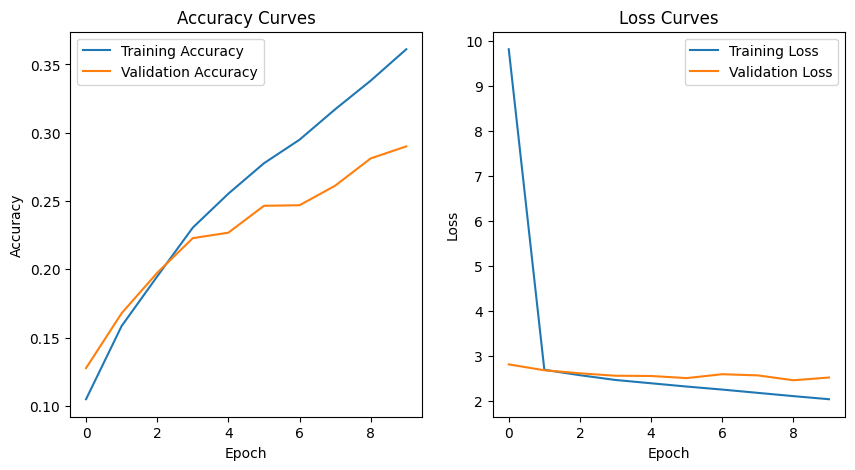

In [200]:
# using (train, train_labels), (test, test_labels)
# Predict labels for the testing set and report the accuracy of your model on the testing set.
predict_lab=model.predict(test)
labels=predict_lab.argmax(axis=-1)
#report accuracy of model
# Return the mean accuracy on the given test data and labels.
mean_acc=accuracy_score(test_labels,labels)
print('CNN Accuracy: %.3f' % (mean_acc * 100))

print(classification_report(test_labels, labels, target_names=target_name))

cf_mat=confusion_matrix(test_labels,labels)

cm_df = pd.DataFrame(cf_mat,
                     index = target_name, 
                     columns = target_name)

#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# show the results:
plotResults(history)

**Use ImageDataGenerator** 

`Keras’ ImageDataGenerator class` allows the users to perform image augmentation while training the model.It loads the image dataset in memory and generates batches of augmented data. It is used to stream image dataset from keras to improve CNN model performance. her two ML models`*

**Results:**
For 1 layer it takes **1m 51s** to train model for 50000 images.From the results on the training dataset of 50000 images the accuracy of the  model is **44.98%.** Monitoring the confusion matrix huge bias towards classification of `people` target class

When the CNN has double the layers. It takes **3m 45.2s** to train model for 50000 images.From the results accuracy of the  model is **49.2%** 5% improvement. Monitoring the confusion matrix bias towards classification of images as `Household furniture` target class

When the CNN adds a 3rd layer.It takes **5m 5.6s** to train model for 50000 images. From the results accuracy of the model is **53.56%** accuracy.Monitoring the confusion matrix bias towards classification of images as `Large outdoor scenes`

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_

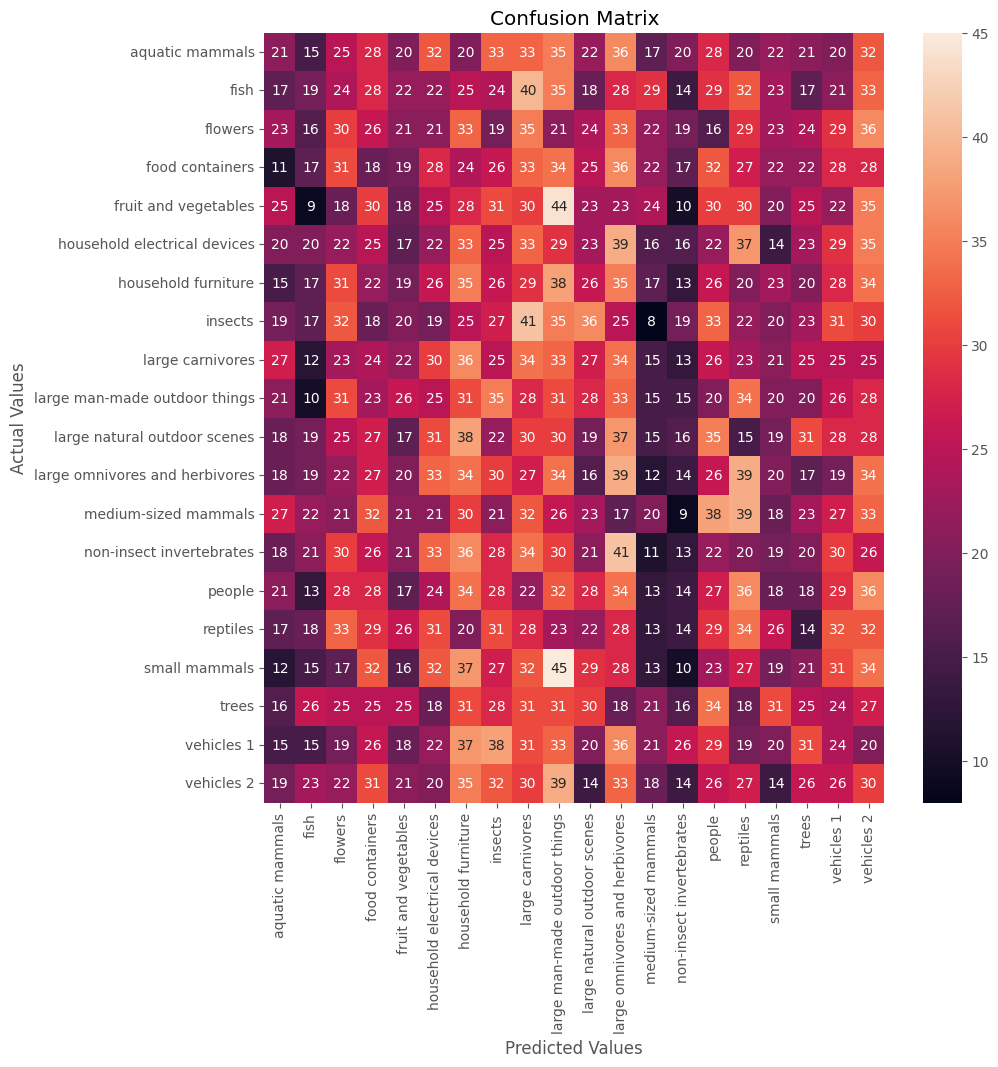

In [31]:
# using (train, train_labels), (test, test_labels)
# source: https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
# source2: https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/
# source3:https://www.geeksforgeeks.org/multiclass-image-classification-using-transfer-learning/
from keras.preprocessing.image import ImageDataGenerator
# import numpy package
import numpy as np
# import matplotlib package for visualisation
import matplotlib.pyplot as plt
# import tensorflow
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# load the CIFAR-100 dataset.
(train, train_labels), (test, test_labels) = tf.keras.datasets.cifar100.load_data(label_mode="coarse")

train_labels = tf.keras.utils.to_categorical(train_labels)
print(train.shape)
test_labels =  tf.keras.utils.to_categorical(test_labels)
print(test.shape)


datagen = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.2,)
        # fill_mode="nearest")

train_generator = datagen.flow(train, train_labels,subset='training', batch_size=64)
test_generator = datagen.flow(test, test_labels, batch_size=64)
validation=datagen.flow(train, train_labels, subset='validation',batch_size=64)

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3,3),padding='same', kernel_initializer='he_uniform',activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer='he_uniform', padding='same'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  # the feature maps output from the feature extraction part of the model must be flattened
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(20,activation='sigmoid')
])
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam",
              metrics=['accuracy'])

history2 = model.fit(train_generator,
                              steps_per_epoch=(len(train)*0.8)//64,
                              epochs=10, validation_data=validation,
                              validation_steps=(len(train)*0.2)//64,verbose=0)
# plotResults(history2)
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=0)
print('CNN2 Accuracy: %.3f' % (acc * 100))

# predict_lab=model.predict(test)
predict_lab = model.predict(test_generator, steps=len(test_generator), verbose=0)
labels=predict_lab.argmax(axis=-1)
# print(labels)
print(classification_report(np.argmax(test_labels,axis=-1), labels, target_names=target_name))

cf_mat=confusion_matrix(np.argmax(test_labels,axis=-1),labels)

cm_df = pd.DataFrame(cf_mat,
                     index = target_name, 
                     columns = target_name)

#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Plot the graph for the 2nd CNN

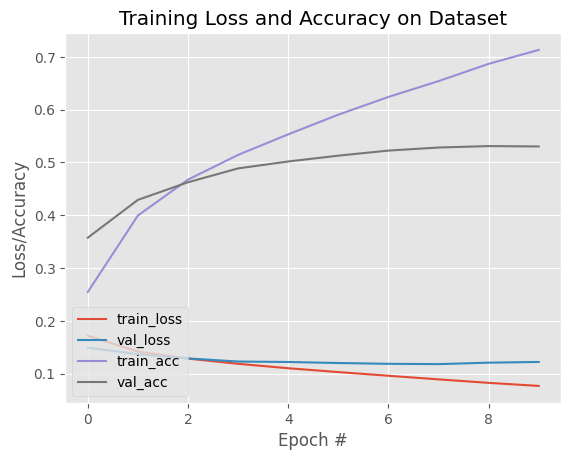

In [32]:
# source: https://pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
# plot the training loss and accuracy
N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history2.history["loss"], label="train_loss")
plt.plot(N,history2.history["val_loss"], label="val_loss")
plt.plot(N, history2.history["accuracy"], label="train_acc")
plt.plot(N, history2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()